In [49]:
#import display and Markdown
from IPython.display import display, Markdown
from nilearn.plotting import plot_glass_brain
from nilearn.image import math_img, new_img_like, load_img
import matplotlib.pyplot as plt

In [36]:
#use nilearn plot glass brain feature to plot the brain image


#open the nii file

level2_sst_path = '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/'

nii_files_to_show = {
    'CS>FS': level2_sst_path + 'conditions_20230616/CS>FS/spmT_0001.nii',
    'CorrectGoFollowing(CS>FS)': level2_sst_path + 'posterror_20230616/CorrectGoFollowing(CS>FS)/spmT_0001.nii',
    'CueFollowing(CS>FS)': level2_sst_path + 'posterror_cues_no_rt_20230616/CueFollowing(CS>FS)/spmT_0001.nii'
}

#use dictionary comprehension to create a dictionary for each item in nii_files_to_show, so that we have adicitonary of dictionaries
#each dictionary should have the key as the name of the contrast, and the value as the nii file path
nii_dict = {k:{'path':nii_files_to_show[k]} for k in nii_files_to_show.keys()}


#nii_dict['CS>FS']['tthresh'] = 5.05
nii_dict['CS>FS']['tthresh'] = 8
nii_dict['CueFollowing(CS>FS)']['tthresh'] = 5.102
nii_dict['CorrectGoFollowing(CS>FS)']['tthresh'] = 5.102



In [37]:
nii_dict

{'CS>FS': {'path': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/conditions_20230616/CS>FS/spmT_0001.nii',
  'tthresh': 8},
 'CorrectGoFollowing(CS>FS)': {'path': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/posterror_20230616/CorrectGoFollowing(CS>FS)/spmT_0001.nii',
  'tthresh': 5.102},
 'CueFollowing(CS>FS)': {'path': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/posterror_cues_no_rt_20230616/CueFollowing(CS>FS)/spmT_0001.nii',
  'tthresh': 5.102}}

### CS>FS

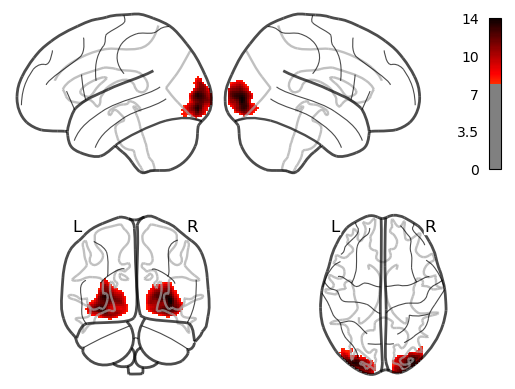

### CorrectGoFollowing(CS>FS)

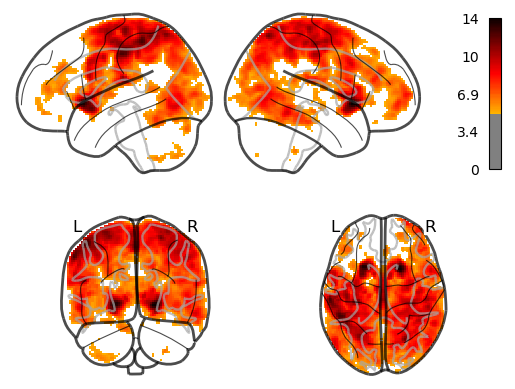

### CueFollowing(CS>FS)

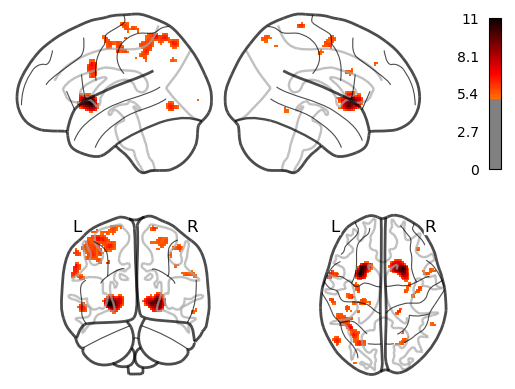

In [50]:


for nii_key in nii_dict.keys():
    #print the nii_key using markdown and display as HTML
    display(Markdown('### ' + nii_key))

    fig, axes = plt.subplots(nrows=2, ncols=1)

    ni_img = load_img(nii_dict[nii_key]['path'])
    positive_img = math_img("np.where(img >= 0, img, 0)", img=ni_img)


    #use plot glass brain in two rows
    #and only display positive activity
    plot_glass_brain(positive_img,
    threshold=nii_dict[nii_key]['tthresh'], colorbar=True, plot_abs=False,
    display_mode='lr',vmin=0,axes=axes[0]
    )
    plot_glass_brain(positive_img,
    threshold=nii_dict[nii_key]['tthresh'], colorbar=False, plot_abs=False,
    display_mode='yz',vmin=0,axes=axes[1]
    )
    plt.show()